### import libraries and dataset

In [7]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
data = pd.read_csv('dataset/Data_Science_CO2.csv', sep=";")
print(data.columns)

Index(['country', 'year', 'iso_code', 'population', 'gdp', 'cement_co2',
       'cement_co2_per_capita', 'co2', 'co2_growth_abs', 'co2_growth_prct',
       'co2_including_luc', 'co2_including_luc_growth_abs',
       'co2_including_luc_growth_prct', 'co2_including_luc_per_capita',
       'co2_including_luc_per_gdp', 'co2_including_luc_per_unit_energy',
       'co2_per_capita', 'co2_per_gdp', 'co2_per_unit_energy', 'coal_co2',
       'coal_co2_per_capita', 'consumption_co2', 'consumption_co2_per_capita',
       'consumption_co2_per_gdp', 'cumulative_cement_co2', 'cumulative_co2',
       'cumulative_co2_including_luc', 'cumulative_coal_co2',
       'cumulative_flaring_co2', 'cumulative_gas_co2', 'cumulative_luc_co2',
       'cumulative_oil_co2', 'cumulative_other_co2', 'energy_per_capita',
       'energy_per_gdp', 'flaring_co2', 'flaring_co2_per_capita', 'gas_co2',
       'gas_co2_per_capita', 'ghg_excluding_lucf_per_capita', 'ghg_per_capita',
       'land_use_change_co2', 'land_use_chang

### scatterplot GDP vs Total CO2 emmission & GDP per Capita vs. CO2 Emissions per Capita

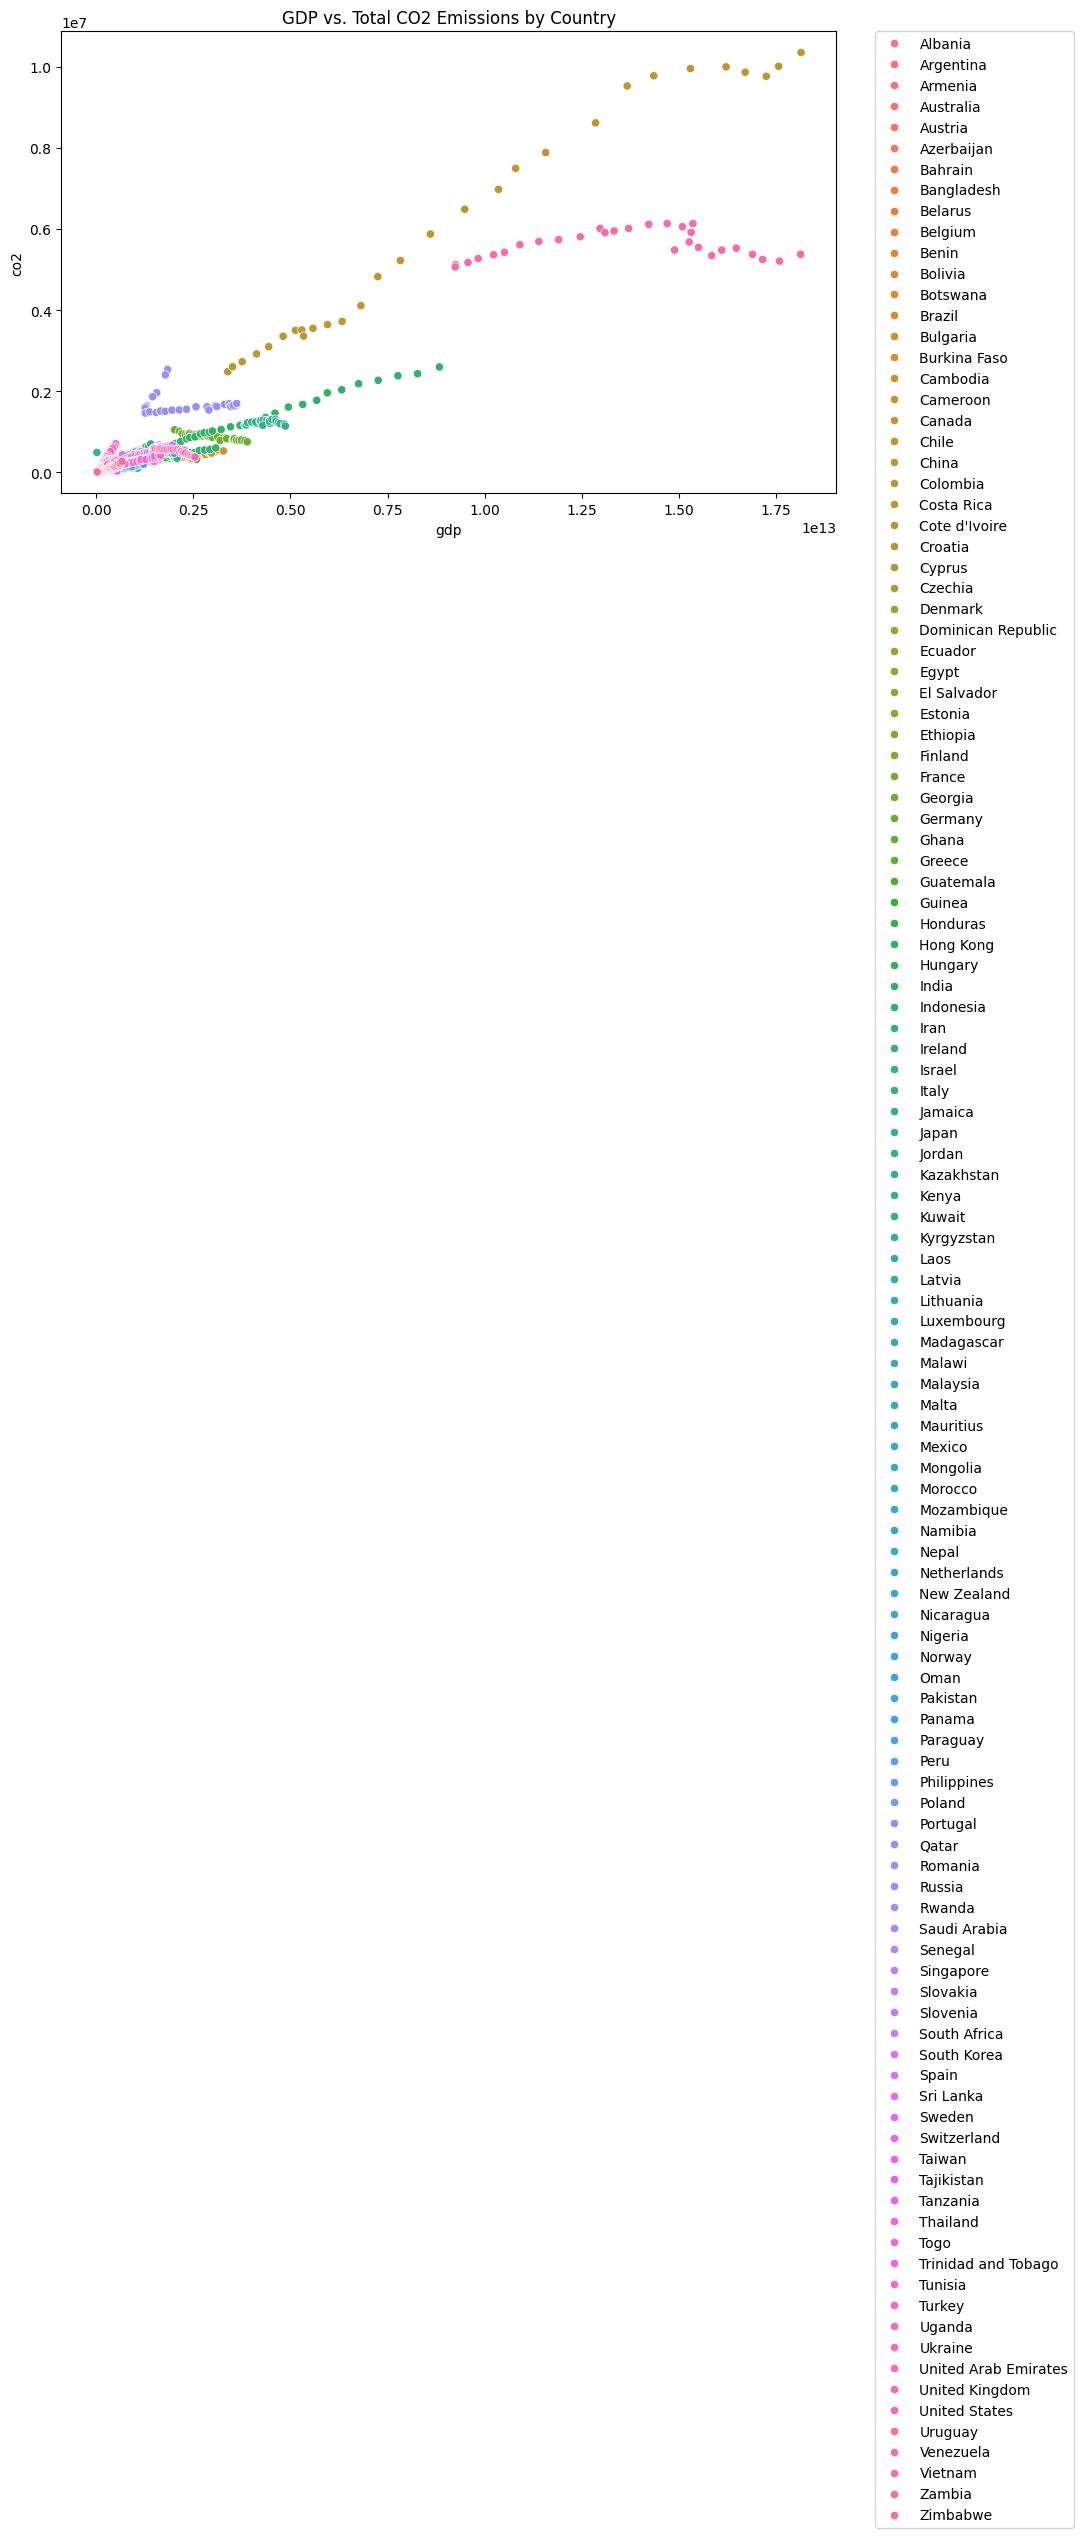

In [76]:
plt.figure(figsize=(10, 6))
plot = sns.scatterplot(x='gdp', y='co2', hue='country', data=data)
plt.title("GDP vs. Total CO2 Emissions by Country")
plot.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.show()

### line chart time series of gdp

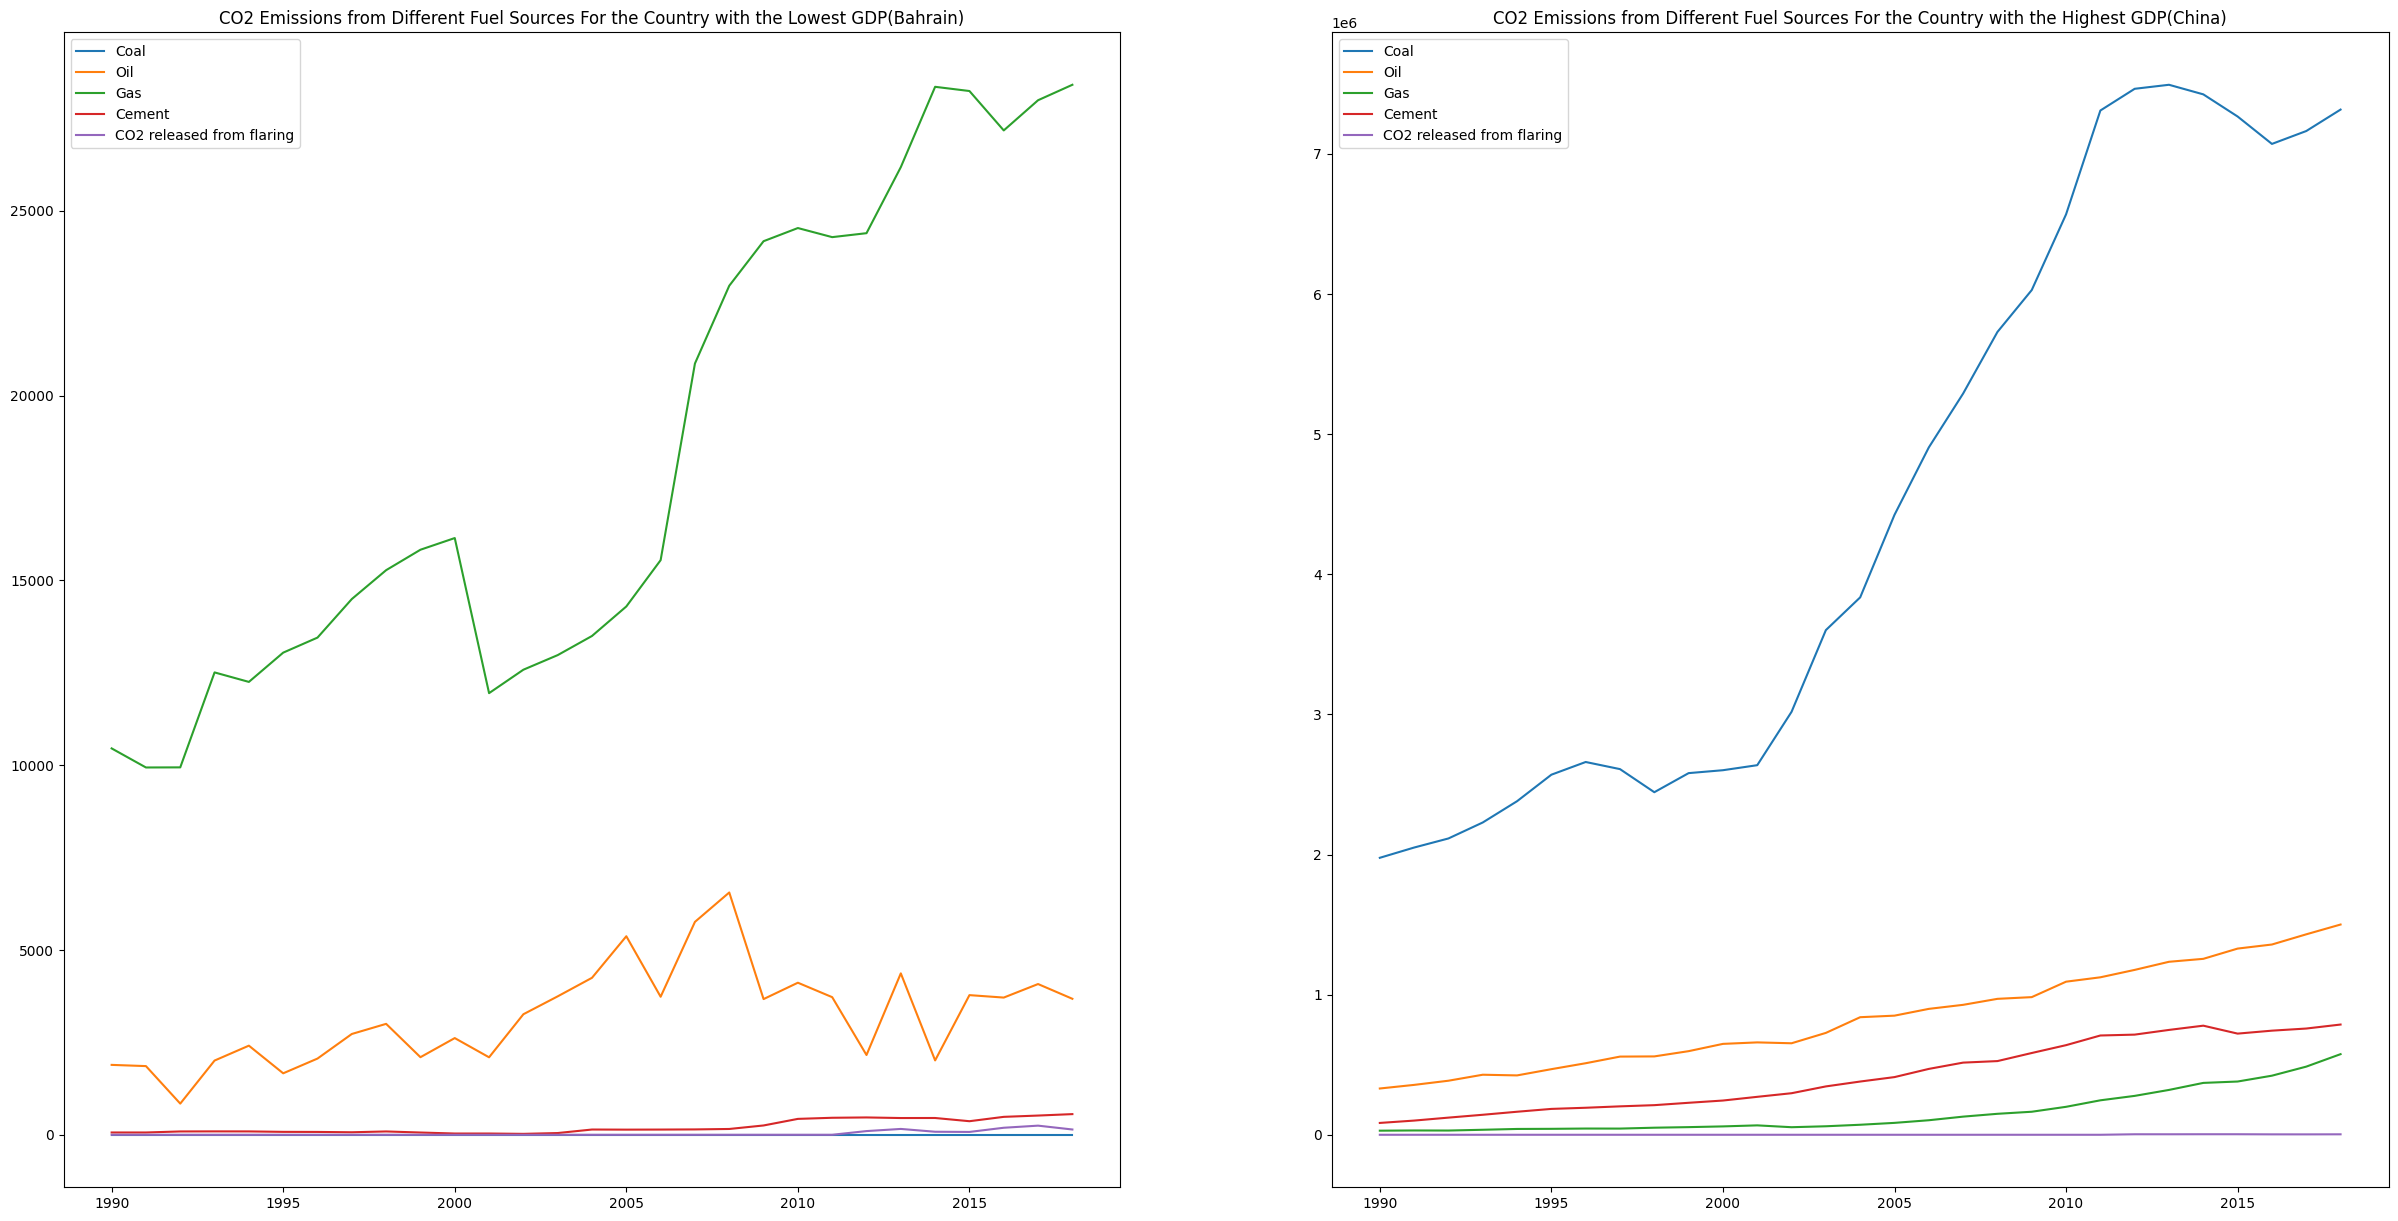

In [69]:
# remove world data
data = data[data['country'] != 'World']

# find the country with the lowest and highest GDP
lowest_gdp_country = data.loc[data['gdp'].idxmin(), 'country']
max_gdp_country = data.loc[data['gdp'].idxmax(), 'country']

# get all the rows for the countries with the lowest and highest GDP
lowest_gdp_country_rows = data[data['country'] == lowest_gdp_country]
max_gdp_country_rows = data[data['country'] == max_gdp_country]

plt.figure(figsize=(30, 15))
plt.subplot(1, 2, 1)
plt.plot(lowest_gdp_country_rows['year'], lowest_gdp_country_rows['coal_co2'], label='Coal')
plt.plot(lowest_gdp_country_rows['year'], lowest_gdp_country_rows['oil_co2'], label='Oil')
plt.plot(lowest_gdp_country_rows['year'], lowest_gdp_country_rows['gas_co2'], label='Gas')
plt.plot(lowest_gdp_country_rows['year'], lowest_gdp_country_rows['cement_co2'], label='Cement')
plt.plot(lowest_gdp_country_rows['year'], lowest_gdp_country_rows['flaring_co2'], label='CO2 released from flaring')
plt.legend()
plt.title(f"CO2 Emissions from Different Fuel Sources For the Country with the Lowest GDP({lowest_gdp_country})")

plt.subplot(1, 2, 2)
plt.plot(max_gdp_country_rows['year'], max_gdp_country_rows['coal_co2'], label='Coal')
plt.plot(max_gdp_country_rows['year'], max_gdp_country_rows['oil_co2'], label='Oil')
plt.plot(max_gdp_country_rows['year'], max_gdp_country_rows['gas_co2'], label='Gas')
plt.plot(max_gdp_country_rows['year'], max_gdp_country_rows['cement_co2'], label='Cement')
plt.plot(max_gdp_country_rows['year'], max_gdp_country_rows['flaring_co2'], label='CO2 released from flaring')
plt.legend()
plt.title(f"CO2 Emissions from Different Fuel Sources For the Country with the Highest GDP({max_gdp_country})")

plt.show()

### bar plot Comparison of CO2 per GDP Across Countries

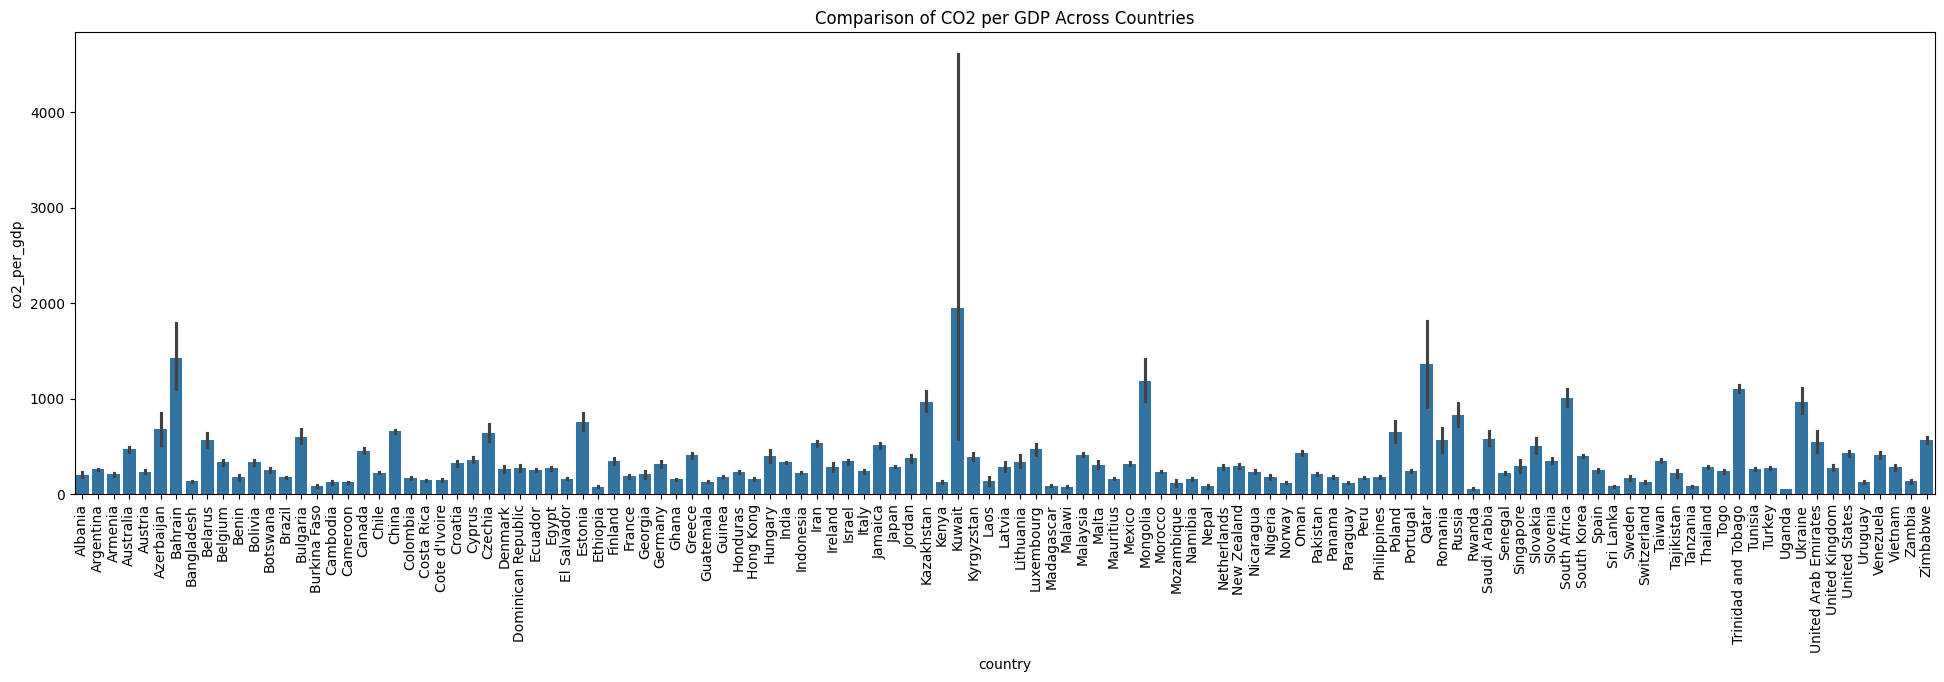

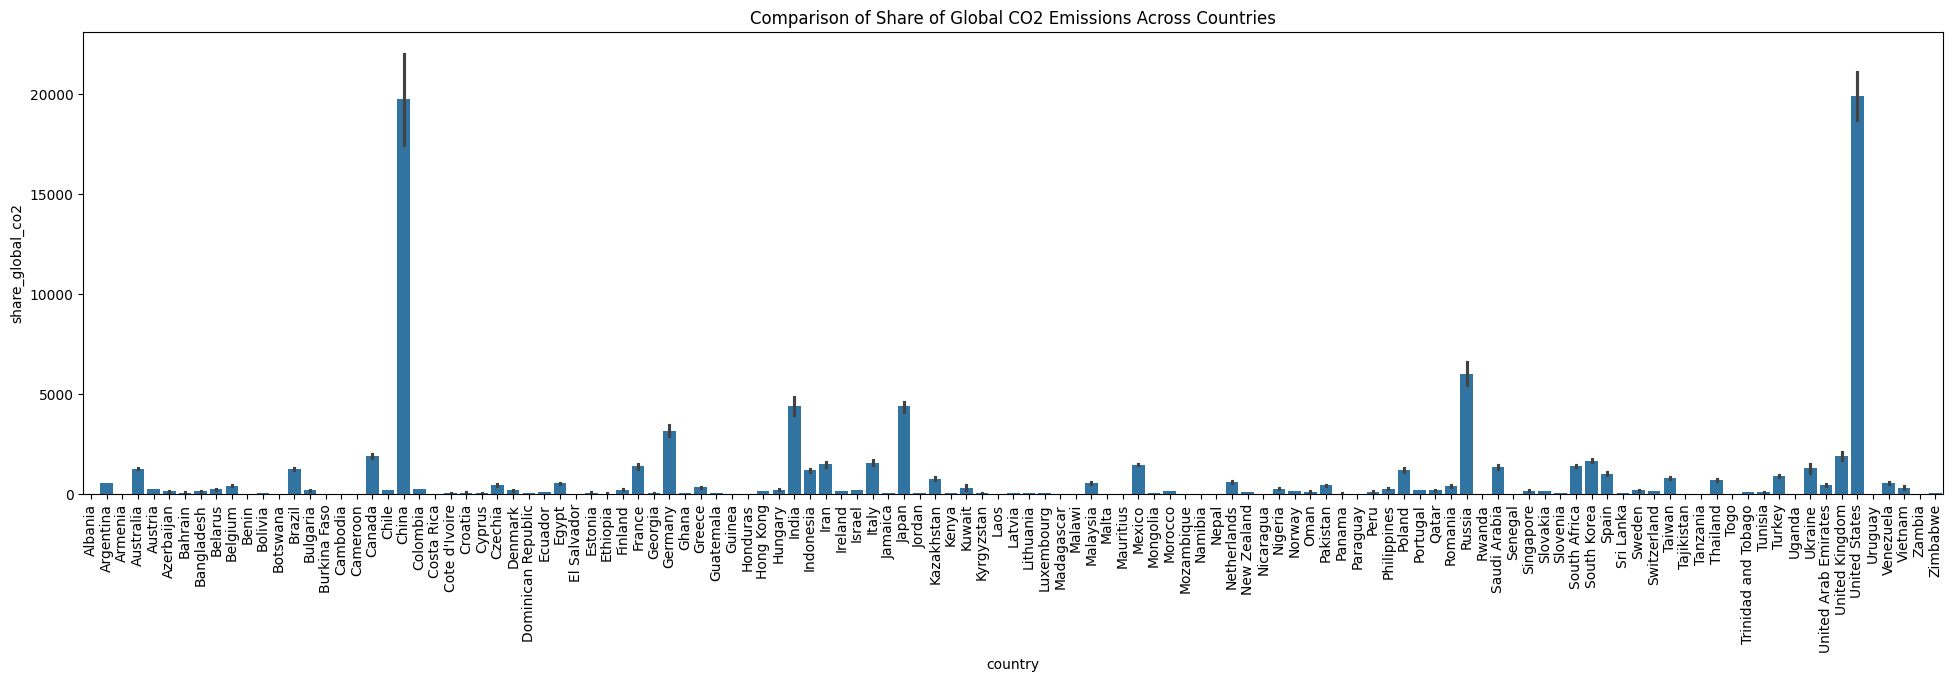

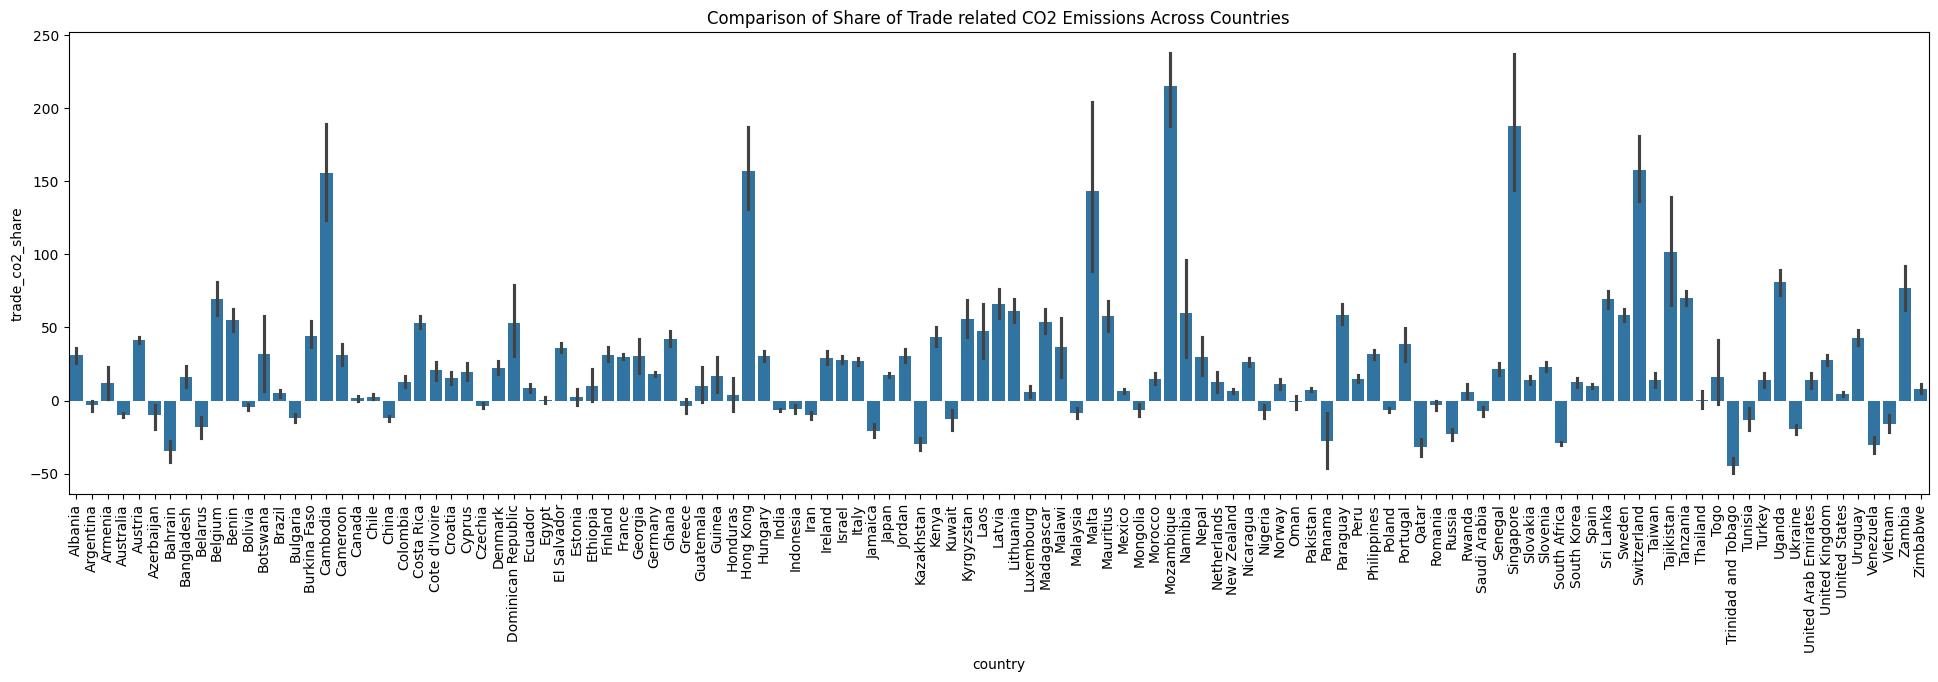

In [73]:
plt.figure(figsize=(24, 6))
sns.barplot(x='country', y='co2_per_gdp', data=data)
plt.title("Comparison of CO2 per GDP Across Countries")
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(24, 6))
sns.barplot(x='country', y='share_global_co2', data=data)
plt.title("Comparison of Share of Global CO2 Emissions Across Countries")
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(24, 6))
sns.barplot(x='country', y='trade_co2_share', data=data)
plt.title("Comparison of Share of Trade related CO2 Emissions Across Countries")
plt.xticks(rotation=90)
plt.show()

### heatmap

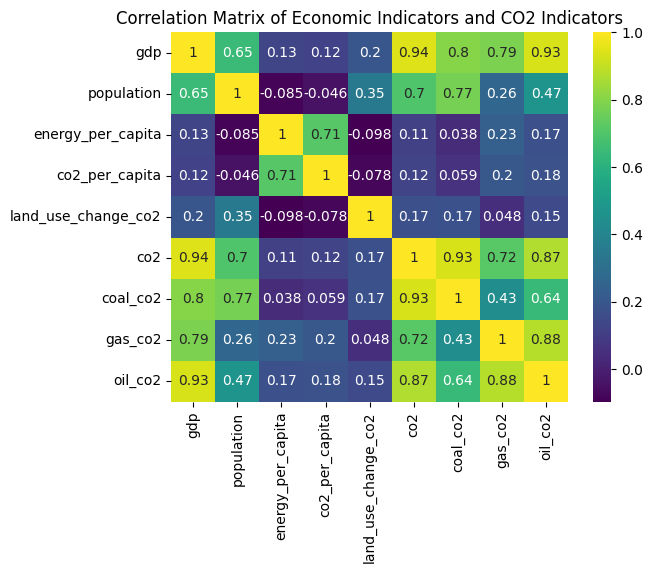

In [79]:
corr_matrix = data[['gdp', 'population', 'energy_per_capita', 'co2_per_capita', 'land_use_change_co2', 'co2', 'coal_co2', 'gas_co2', 'oil_co2']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='viridis')
plt.title("Correlation Matrix of Economic Indicators and CO2 Indicators")
plt.show()